# EDA

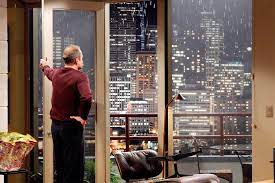

Bonnie Williams	-Seller-	

Has several houses, some in bad neighborhoods
willing to evict people
timing?
big returns, open for renovations

In [8]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [20]:
#import the house details from csv
df_houses = pd.read_csv('data/house_details.csv')

#display first 7 rows
df_houses.head(7)

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id,id.1
0,1000102,6.000,3.000,2400.000,9373.000,2.000,NaN,0.000,3,7,...,0.000,98002,47.326,-122.214,2060.000,7316.000,2015-04-22,300000.000,1000102,2496
1,1000102,6.000,3.000,2400.000,9373.000,2.000,NaN,0.000,3,7,...,0.000,98002,47.326,-122.214,2060.000,7316.000,2014-09-16,280000.000,1000102,2495
2,1200019,4.000,1.750,2060.000,26036.000,1.000,NaN,0.000,4,8,...,0.000,98166,47.444,-122.351,2590.000,21891.000,2014-05-08,647500.000,1200019,6730
3,1200021,3.000,1.000,1460.000,43000.000,1.000,0.000,0.000,3,7,...,0.000,98166,47.443,-122.347,2250.000,20023.000,2014-08-11,400000.000,1200021,8405
4,2800031,3.000,1.000,1430.000,7599.000,1.500,0.000,0.000,4,6,...,0.000,98168,47.478,-122.265,1290.000,10320.000,2015-04-01,235000.000,2800031,8801
5,3600057,4.000,2.000,1650.000,3504.000,1.000,0.000,0.000,3,7,...,20130.000,98144,47.580,-122.294,1480.000,3504.000,2015-03-19,402500.000,3600057,3554
6,3600072,4.000,2.750,2220.000,5310.000,1.000,NaN,0.000,5,7,...,NaN,98144,47.580,-122.294,1540.000,4200.000,2015-03-30,680000.000,3600072,18507


<Axes: >

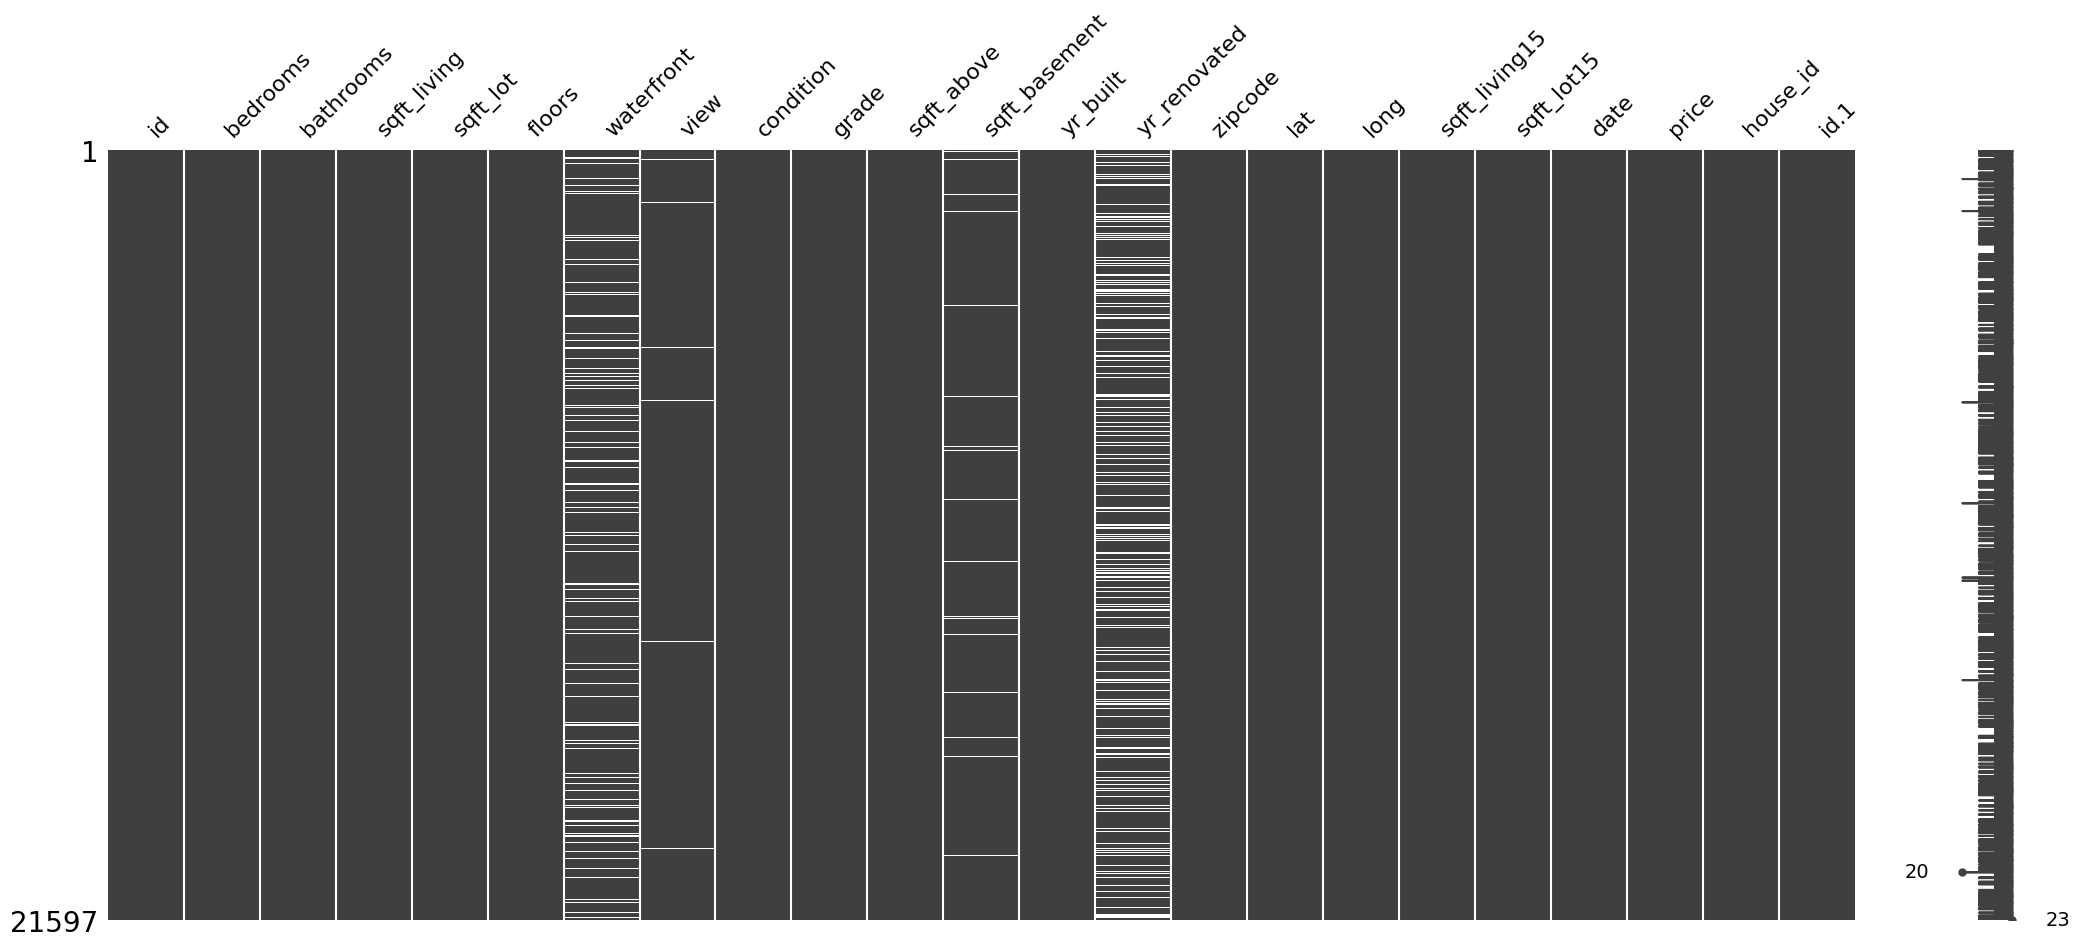

In [11]:
#import missingno and display the form of the dataframe
import missingno as msno
msno.matrix(df_houses)

In [12]:
# check how many duplicated rows exist in the data frame
df_houses.duplicated().value_counts()

False    21597
Name: count, dtype: int64

In [13]:
# check data types in data frame
df_houses.dtypes

id                 int64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above       float64
sqft_basement    float64
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15    float64
sqft_lot15       float64
date              object
price            float64
house_id           int64
id.1               int64
dtype: object

In [18]:
# change "date" dtype to datetime with format %Y/%m/%d
df_houses['date'] = pd.to_datetime(df_houses['date'], format="%Y-%m-%d")
df_houses.dtypes

id                        int64
bedrooms                float64
bathrooms               float64
sqft_living             float64
sqft_lot                float64
floors                  float64
waterfront              float64
view                    float64
condition                 int64
grade                     int64
sqft_above              float64
sqft_basement           float64
yr_built                  int64
yr_renovated            float64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15           float64
sqft_lot15              float64
date             datetime64[ns]
price                   float64
house_id                  int64
id.1                      int64
dtype: object

<Axes: >

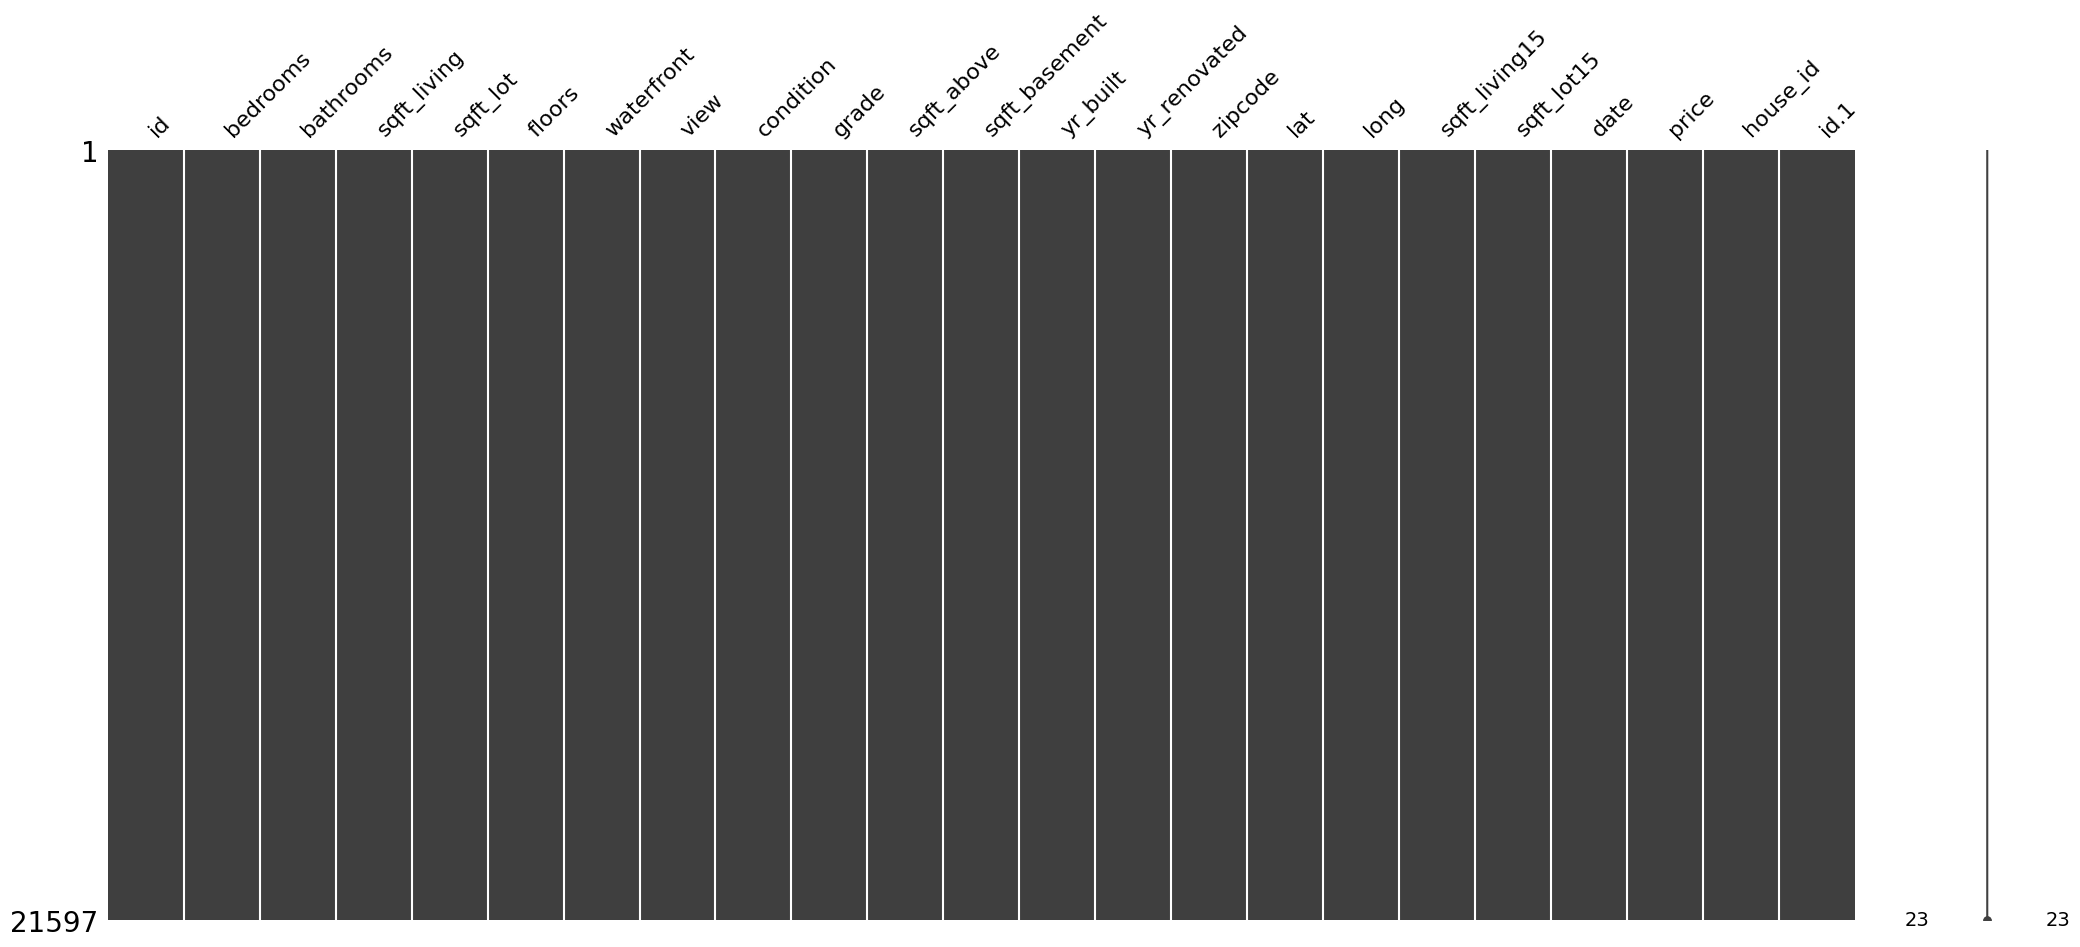

In [33]:
# create a copy of the dataset
df_houses_copied = df_houses.copy()

#fill missing cells with 0
houses_filled = df_houses_copied.fillna(0)

#check the form
msno.matrix(houses_filled)



CONDITION 1: What is the ratio of renovated/not renovated houses

In [34]:
# year is displayed with a 0 as last int
houses_filled['yr_renovated'].head(10)

0       0.000
1       0.000
2       0.000
3       0.000
4       0.000
5   20130.000
6       0.000
7       0.000
8       0.000
9       0.000
Name: yr_renovated, dtype: float64

In [35]:
# removing the last 0
houses_filled['yr_renovated'] = houses_filled['yr_renovated'].apply(lambda x: x/10)
houses_filled['yr_renovated'].head(10)

0      0.000
1      0.000
2      0.000
3      0.000
4      0.000
5   2013.000
6      0.000
7      0.000
8      0.000
9      0.000
Name: yr_renovated, dtype: float64

In [43]:
#filter and count renovated houses
houses_renovated = houses_filled[houses_filled['yr_renovated'] > 0].count('yr_renovated')
houses_not_renovated = houses_filled[houses_filled['yr_renovated'] == 0].count()

print(houses_renovated)


id               744
bedrooms         744
bathrooms        744
sqft_living      744
sqft_lot         744
floors           744
waterfront       744
view             744
condition        744
grade            744
sqft_above       744
sqft_basement    744
yr_built         744
yr_renovated     744
zipcode          744
lat              744
long             744
sqft_living15    744
sqft_lot15       744
date             744
price            744
house_id         744
id.1             744
dtype: int64
